<a href="https://colab.research.google.com/github/ni414/notebook/blob/master/Temp_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymannkendall

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc
import pymannkendall as pmk
import scipy.stats as sp

In [16]:
xls = pd.ExcelFile('smart_cities.xlsx')
mktest=pd.read_excel('mktest.xlsx')
df1 = pd.read_excel(xls, 'Sheet1')
df2 = pd.read_excel(xls, 'Sheet2')

In [6]:
mean_t=np.load('/content/drive/MyDrive/mean_temperature_data.npy')
min_t=np.load('/content/drive/MyDrive/min_temperature_data.npy')
max_t=np.load('/content/drive/MyDrive/max_temperature_data.npy')
r=np.load('/content/drive/MyDrive/rainfall_data_120.npy')
#r.shape,t.shape

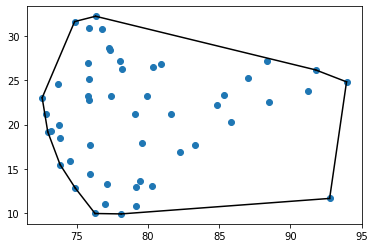

In [19]:
#mktest=pd.read_excel('smart_cities.xlsx')
y=df1['Latitude'].values
x=df1['Longitude'].values
points=np.vstack((x[:51],y[:51])).T
hull = sp.spatial.ConvexHull(points)
hull_points = hull.simplices

plt.scatter(points[:,0], points[:,1])
for simplex in hull_points:
  plt.plot(points[simplex,0], points[simplex,1], 'k-')

plt.show()

In [12]:
for i in range(1):
  print(df1.loc[i,'y-axis-temp'],df1.loc[i,'x-axis-temp'],df1.loc[i,'City'])
  city=df1.loc[i,'City']
  mean_temp=mean_t[:,:,int(df1.loc[i,'y-axis-temp']),int(df1.loc[i,'x-axis-temp'])]
  min_temp=min_t[:,:,int(df1.loc[i,'y-axis-temp']),int(df1.loc[i,'x-axis-temp'])]
  max_temp=max_t[:,:,int(df1.loc[i,'y-axis-temp']),int(df1.loc[i,'x-axis-temp'])]
  mean_temp=mean_temp.reshape([mean_temp.shape[0]*mean_temp.shape[1],])
  min_temp=min_temp.reshape([min_temp.shape[0]*min_temp.shape[1],])
  max_temp=max_temp.reshape([max_temp.shape[0]*max_temp.shape[1],])
  print(sp.describe(mean_temp))
  #print(sp.describe(min_temp))
  #print(sp.describe(max_temp))
  print(sp.normaltest(mean_temp))
  print(sp.skew(mean_temp))
  print(sp.skewtest(mean_temp))
  print(sp.kurtosis(mean_temp))
  print(sp.kurtosistest(mean_temp))

13.0 19.0 Bhubaneswar
DescribeResult(nobs=768, minmax=(19.169999999999998, 32.28032258064516), mean=26.874968569540176, variance=10.636260016610256, skewness=-0.572086871165019, kurtosis=-0.8020910268954418)
NormaltestResult(statistic=99.29853184335394, pvalue=2.7390362479223237e-22)
-0.572086871165019
SkewtestResult(statistic=-6.10228840839728, pvalue=1.0456048142693305e-09)
-0.8020910268954418
KurtosistestResult(statistic=-7.877855547298016, pvalue=3.330474258090229e-15)


In [18]:
y=df1['Latitude'].values[:51]
x=df1['Longitude'].values[:51]
z=mktest['z'].values[0:len(mktest):3]
xx,yy=np.meshgrid(y,x)


array([[20.2691, 18.5204, 26.9167, ..., 25.18  , 10.787 , 27.17  ],
       [20.2691, 18.5204, 26.9167, ..., 25.18  , 10.787 , 27.17  ],
       [20.2691, 18.5204, 26.9167, ..., 25.18  , 10.787 , 27.17  ],
       ...,
       [20.2691, 18.5204, 26.9167, ..., 25.18  , 10.787 , 27.17  ],
       [20.2691, 18.5204, 26.9167, ..., 25.18  , 10.787 , 27.17  ],
       [20.2691, 18.5204, 26.9167, ..., 25.18  , 10.787 , 27.17  ]])

In [41]:
def plot_3temp(month_meant,month_mint,month_maxt,city):
  months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
  m=np.arange(len(months))
  #plt.figure(figsize = (10, 5))
  fig, ax = plt.subplots(figsize =(10, 5))
  patterns = [ "|" , ".." , "///" , "**" , "-", ".", "*","x", "o", "O" ]
  ax=plt.plot(m+0.00,month_meant,label='Mean T',marker='.')
  ax=plt.plot(m+0.00,month_mint,label='Min T',marker='.')
  ax=plt.plot(m+0.00,month_maxt,label='Max T',marker='.')
  #stdv=np.std(rmse_lstm)
  plt.xticks(ticks=m, labels=months)
  plt.title('Avg Monthly temp over 1951-2014 for '+city,fontsize=15)
  plt.xlabel('Months',fontsize=10)
  plt.ylabel('Temperature in degree celcius',fontsize=10)
  plt.legend()
  plt.savefig(city+'.png',dpi=300)

In [16]:
def calculate_3avg():
  #temp_val=np.zeros((51,12))
  for i in range(51):
    
    print(df1.loc[i,'y-axis-temp'],df1.loc[i,'x-axis-temp'],df1.loc[i,'City'])
    city=df1.loc[i,'City']
    bbs_meant=mean_t[:,:,int(df1.loc[i,'y-axis-temp']),int(df1.loc[i,'x-axis-temp'])]
    bbs_mint=min_t[:,:,int(df1.loc[i,'y-axis-temp']),int(df1.loc[i,'x-axis-temp'])]
    bbs_maxt=max_t[:,:,int(df1.loc[i,'y-axis-temp']),int(df1.loc[i,'x-axis-temp'])]
    
    bbs_meant=bbs_meant.reshape([64*12,])
    bbs_mint=bbs_mint.reshape([64*12,])
    bbs_maxt=bbs_maxt.reshape([64*12,])

    m1=np.zeros((12,64))
    m2=np.zeros((12,64))
    m3=np.zeros((12,64))
    for i in range(12):
      m1[i,:]=bbs_meant[i:768:12]
      m2[i,:]=bbs_mint[i:768:12]
      m3[i,:]=bbs_maxt[i:768:12]
    month_meant=[]
    month_mint=[]
    month_maxt=[]
    for i in range(12):
      month_meant.append(round(np.mean(m1[i]),3))
      month_mint.append(round(np.mean(m2[i]),3))
      month_maxt.append(round(np.mean(m3[i]),3))
    #print((month_meant))
    #print((month_mint))
    #print((month_maxt))
    #temp_val[i,:]=month_meant
    #plot_3temp(month_meant,month_mint,month_maxt,city)
    premonsoon=round(np.mean(month_meant[2:5]),3)
    monsoon=round(np.mean(month_meant[5:9]),3)
    postmonsoon=round(np.mean(month_meant[9:11]),3)
    winter=(month_meant[:2])
    winter.insert(0,month_meant[11])
    winter=round(np.mean(winter),3)
    print(premonsoon,monsoon,postmonsoon,winter)

In [ ]:
calculate_3avg()

In [33]:
def plot_seasonal0(seasonal_meant,city,season):
  years=np.arange(1951,2015)
  plt.figure(figsize=(10,6))
  z = np.polyfit(years, seasonal_meant, 1)
  p = np.poly1d(z)
  #print(p,z)
  plt.plot(years,p(years),'--',label='Trendline'+str(p))
  #plt.plot([],[],label=str(p))
  plt.plot(years,seasonal_meant,label='Mean T')
  #plt.text(1953,31,p)
  plt.title('Avg temp during '+season+' season over 1951-2014 for '+city,fontsize=15)
  plt.xlabel('Year',fontsize=13)
  plt.ylabel('Temperature in degree celcius',fontsize=13)
  plt.legend()
  plt.savefig(season+'_'+city+'.png',dpi=300)

In [34]:
def plot_seasonal1(seasonal_meant,city,season):
  years=np.arange(1951,2015)
  plt.figure(figsize=(10,6))
  z = np.polyfit(years, seasonal_meant, 1)
  p = np.poly1d(z)
  #print(p,z)
  plt.plot(years,p(years),'--',label='Trendline'+str(p))
  #plt.plot([],[],label=str(p))
  plt.plot(years,seasonal_meant,label='Mean T')
  #plt.text(1953,31,p)
  plt.title('Avg temp during '+season+' season over 1951-2014 for '+city,fontsize=15)
  plt.xlabel('Year',fontsize=13)
  plt.ylabel('Temperature in degree celcius',fontsize=13)
  plt.legend()
  plt.savefig(season+'_'+city+'.png',dpi=300)

In [35]:
def plot_seasonal2(seasonal_meant,city,season):
  years=np.arange(1951,2015)
  plt.figure(figsize=(10,6))
  z = np.polyfit(years, seasonal_meant, 1)
  p = np.poly1d(z)
  #print(p,z)
  plt.plot(years,p(years),'--',label='Trendline'+str(p))
  #plt.plot([],[],label=str(p))
  plt.plot(years,seasonal_meant,label='Mean T')
  #plt.text(1953,31,p)
  plt.title('Avg temp during '+season+' season over 1951-2014 for '+city,fontsize=15)
  plt.xlabel('Year',fontsize=13)
  plt.ylabel('Temperature in degree celcius',fontsize=13)
  plt.legend()
  plt.savefig(season+'_'+city+'.png',dpi=300)

In [36]:
def plot_seasonal3(seasonal_meant,city,season):
  years=np.arange(1951,2015)
  plt.figure(figsize=(10,6))
  z = np.polyfit(years, seasonal_meant, 1)
  p = np.poly1d(z)
  #print(p,z)
  plt.plot(years,p(years),'--',label='Trendline'+str(p))
  #plt.plot([],[],label=str(p))
  plt.plot(years,seasonal_meant,label='Mean T')
  #plt.text(1953,31,p)
  plt.title('Avg temp during '+season+' season over 1951-2014 for '+city,fontsize=15)
  plt.xlabel('Year',fontsize=13)
  plt.ylabel('Temperature in degree celcius',fontsize=13)
  plt.legend()
  plt.savefig(season+'_'+city+'.png',dpi=300)

In [ ]:
for i in range(3,51):
  print(df1.loc[i,'y-axis-temp'],df1.loc[i,'x-axis-temp'],df1.loc[i,'City'])
  city=df1.loc[i,'City']
  bbs_meant=mean_t[:,:,int(df1.loc[i,'y-axis-temp']),int(df1.loc[i,'x-axis-temp'])]
  bbs_mint=min_t[:,:,int(df1.loc[i,'y-axis-temp']),int(df1.loc[i,'x-axis-temp'])]
  bbs_maxt=max_t[:,:,int(df1.loc[i,'y-axis-temp']),int(df1.loc[i,'x-axis-temp'])]
  print(bbs_meant.shape)
  seasonal_meant=np.zeros((4,64))
  seasonal_mint=np.zeros((4,64))
  seasonal_maxt=np.zeros((4,64))
  for j in range(64):
    year=bbs_meant[j,:]
    val=[]
    premon=round(np.mean(year[2:5]),3)
    mon=round(np.mean(year[5:9]),3)
    postmon=round(np.mean(year[9:11]),3)
    winter=list(year[:2])
    #print(winter.shape)
    winter.insert(0,year[11])
    winter=round(np.mean(winter),3)
    seasonal_meant[0,j]=premon
    seasonal_meant[1,j]=mon
    seasonal_meant[2,j]=postmon
    seasonal_meant[3,j]=winter
  print(seasonal_meant)
  pd.DataFrame(seasonal_meant).to_excel('val.xlsx')
  plot_seasonal0(seasonal_meant[0],city,'premonsoon')
  plot_seasonal1(seasonal_meant[1],city,'monsoon')
  plot_seasonal2(seasonal_meant[2],city,'postmonsoon')
  plot_seasonal3(seasonal_meant[3],city,'winter')

In [55]:
def plot_temp(mean_temp,min_temp,max_temp,city):
  #print(pmk.original_test(mean_temp))
  #print(pmk.original_test(min_temp))
  #print(pmk.original_test(max_temp))
  plt.figure(figsize=(10,6))
  plt.title('Max, Mean and Min Temperature for '+city,fontsize=15)
  plt.plot(max_temp)
  plt.plot(mean_temp)
  plt.plot(min_temp)
  plt.ylabel('Temperature in degree Celcius',fontsize=15)
  plt.xlabel('Months (1951-2014)',fontsize=15)
  plt.legend(['Max Temp','Mean Temp','Min Temp'],loc='upper right') 
  plt.savefig('/content/total/TotalTemp_'+city+'.png',dpi=300) 

In [30]:
#trend_result=np.zeros((51,3,9))
trend_result=pd.DataFrame(columns=['Trend','h','p','z','Tau','s','var_s','senslope','intercept'])
for i in range(51):
  mean_temp=mean_t[:,:,int(df1.loc[i,'y-axis-temp']),int(df1.loc[i,'x-axis-temp'])]
  min_temp=min_t[:,:,int(df1.loc[i,'y-axis-temp']),int(df1.loc[i,'x-axis-temp'])]
  max_temp=max_t[:,:,int(df1.loc[i,'y-axis-temp']),int(df1.loc[i,'x-axis-temp'])]
  mean_temp=mean_temp.reshape([mean_temp.shape[0]*mean_temp.shape[1],])
  min_temp=min_temp.reshape([min_temp.shape[0]*min_temp.shape[1],])
  max_temp=max_temp.reshape([max_temp.shape[0]*max_temp.shape[1],])
  r1=list(pmk.seasonal_test(mean_temp,period=12))
  r2=list(pmk.seasonal_test(min_temp,period=12))
  r3=list(pmk.seasonal_test(max_temp,period=12))
  
  trend_result.loc[len(trend_result.index)]=r1
  trend_result.loc[len(trend_result.index)]=r2
  trend_result.loc[len(trend_result.index)]=r3
  #trend_result=pd.concat([trend_result,r1,r2,r3],axis=1)
  #trend_result[i,0,:]=(pmk.seasonal_test(mean_temp,period=12))
  #trend_result[i,1,:]=(pmk.seasonal_test(min_temp,period=12))
  #trend_result[i,2,:]=(pmk.seasonal_test(max_temp,period=12))
print(trend_result)
trend_result.to_excel('val.xlsx')


"""
  print(pmk.original_test(mean_temp,alpha=0.05))
  print(pmk.original_test(min_temp,alpha=0.05))
  print(pmk.original_test(max_temp,alpha=0.05))
  print("--------------------------------")

  print(pmk.hamed_rao_modification_test(mean_temp,alpha=0.05,lag=None))
  print(pmk.hamed_rao_modification_test(min_temp,alpha=0.05,lag=None))
  print(pmk.hamed_rao_modification_test(max_temp,alpha=0.05,lag=None))
  print("--------------------------------")

  
  print("--------------------------------")
  print(pmk.sens_slope(mean_temp))
  print(pmk.sens_slope(min_temp))
  print(pmk.sens_slope(max_temp))
  print("--------------------------------")
  print(pmk.regional_test(mean_temp))
  print(pmk.regional_test(min_temp))
  print(pmk.regional_test(max_temp))
  print("--------------------------------")
  print(pmk.seasonal_sens_slope(mean_temp,period=12))
  print(pmk.seasonal_sens_slope(min_temp,period=12))
  print(pmk.seasonal_sens_slope(max_temp,period=12))
  print("--------------------------------")
  print(pmk.pre_whitening_modification_test(mean_temp))
  print(pmk.pre_whitening_modification_test(min_temp))
  print(pmk.pre_whitening_modification_test(max_temp))
"""
  #plot_temp(mean_temp,min_temp,max_temp,df1.loc[i,'City'])
  

          Trend      h             p  ...     var_s  senslope  intercept
0    increasing   True  1.904931e-04  ...  357502.0  0.004498  27.820614
1      no trend  False  1.517690e-01  ...  357504.0 -0.002013  24.065644
2    increasing   True  7.660539e-14  ...  357503.0  0.011276  31.285970
3    increasing   True  7.162114e-08  ...  357502.0  0.006774  24.732218
4      no trend  False  1.798145e-01  ...  357503.0  0.001547  20.204053
..          ...    ...           ...  ...       ...       ...        ...
148  increasing   True  3.958342e-07  ...  357503.0  0.004810  24.626962
149  increasing   True  0.000000e+00  ...  357503.0  0.022952  32.938500
150  increasing   True  3.111203e-04  ...  357503.0  0.004812  23.063202
151    no trend  False  6.241081e-01  ...  357502.0  0.000806  17.945835
152  increasing   True  4.880226e-08  ...  357503.0  0.009540  27.632213

[153 rows x 9 columns]


'\n  print(pmk.original_test(mean_temp,alpha=0.05))\n  print(pmk.original_test(min_temp,alpha=0.05))\n  print(pmk.original_test(max_temp,alpha=0.05))\n  print("--------------------------------")\n\n  print(pmk.hamed_rao_modification_test(mean_temp,alpha=0.05,lag=None))\n  print(pmk.hamed_rao_modification_test(min_temp,alpha=0.05,lag=None))\n  print(pmk.hamed_rao_modification_test(max_temp,alpha=0.05,lag=None))\n  print("--------------------------------")\n\n  \n  print("--------------------------------")\n  print(pmk.sens_slope(mean_temp))\n  print(pmk.sens_slope(min_temp))\n  print(pmk.sens_slope(max_temp))\n  print("--------------------------------")\n  print(pmk.regional_test(mean_temp))\n  print(pmk.regional_test(min_temp))\n  print(pmk.regional_test(max_temp))\n  print("--------------------------------")\n  print(pmk.seasonal_sens_slope(mean_temp,period=12))\n  print(pmk.seasonal_sens_slope(min_temp,period=12))\n  print(pmk.seasonal_sens_slope(max_temp,period=12))\n  print("------

In [6]:
for i in range(51):
  one_grid=pd.DataFrame()
  #print(df1.loc[i,'City'],df1.loc[i,'x-axis(3rd)'],df1.loc[i, "y-axis(4th)"])
  mean_temp=mean_t[:,:,int(df1.loc[i,"y-axis-temp"]),int(df1.loc[i, 'x-axis-temp'])]
  mean_temp=mean_temp.reshape([mean_temp.shape[0]*mean_temp.shape[1], ])
  #print(type(one_),one_.shape)
  one_grid[df1.loc[i,'City']]=pd.Series(mean_temp)

  #one_grid = one_grid.set_index(dates)
  #print(one_grid)
  city_df=pd.concat([city_df,one_grid],axis=1)
city_df.to_excel('MeanTemp_100.xlsx',index=None)

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from keras.models import Sequential,load_model
from keras.layers import Dense,LSTM,Bidirectional,GRU
from keras.layers import Flatten, Dropout,Reshape
from keras.utils.vis_utils import plot_model
from keras import callbacks
from matplotlib import pyplot as plt
from sklearn import preprocessing
from dateutil.relativedelta import relativedelta
from datetime import date,timedelta

In [ ]:
def compareall(ytest,yhat,mname):
  plt.figure(figsize = (12, 5))
  linestyles = ['-', '--', '-.', ':']
  plt.title('Predicted vs True Values (2005-2020) using '+mname,fontsize=15)
  #p1=plt.figure(1)
  plt.plot(ytest, label='True')
  plt.plot(yhat,  label='Predicted')
  plt.legend()
  
  plt.xlabel('Time(month)',fontsize=15)
  plt.ylabel('Rainfall',fontsize=15)

In [ ]:
def plot_loss (history, model_name):
    #plt.figure(figsize = (10, 6))
    linestyles = ['-', '--', '-.', ':']
    plt.title('Model Loss for ' + model_name,fontsize=15)
    p1=plt.figure(1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])    
    plt.ylabel('Loss',fontsize=15)
    plt.xlabel('Epoch',fontsize=15)
    plt.legend(['Train loss','Val Loss'], loc='upper right')
    
    p2=plt.figure(2)
    #plt.figure(figsize = (10, 6))
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model MAE for ' + model_name)
    plt.ylabel('MAE',fontsize=15)
    plt.xlabel('Epoch',fontsize=15)
    plt.legend(['MAE'], loc='upper right')

In [ ]:
def chopping(data):
  n=data.shape[0]
  train = data[0:int(n*0.87)]
  ##val = data[int(n*0.7):int(n*0.9)]
  test = data[int(n*0.87):]
  return train,test

In [ ]:
def create_dataset (X, look_back = 1):
  Xs, ys = [], []
  for i in range(len(X)-look_back):
    v = X[i:i+look_back]
    Xs.append(v)
    ys.append(X[i+look_back])
  return np.array(Xs), np.array(ys)

def compile_fit(model):
  model.compile(loss='mean_squared_error',optimizer='adam',metrics='mean_absolute_error')
  early_stop = callbacks.EarlyStopping(monitor = 'mean_absolute_error',patience = 10,mode='min')
  history = model.fit(Xtrain, ytrain, epochs = 1000,verbose=0,validation_data = (Xtest,ytest),batch_size = 16, shuffle = False,callbacks = [early_stop])
  return history

In [ ]:
data = np.load('/content/drive/MyDrive/rainfall_data_120.npy')
data = np.where(data<0,0,data)

one_grid = data[:,:,55,78]
one_grid=one_grid.reshape([one_grid.shape[0] * one_grid.shape[1], 1])
#one_grid = preprocessing.normalize(one_grid)

region = data[:, :,54:57, 77:80]

print('Shape of selected place data:',region.shape)
region = region.reshape([region.shape[0] * region.shape[1], 9])
#region = preprocessing.normalize(region)
print('Shape of selected place data:',region.shape)
r=region.reshape([region.shape[0]*region.shape[1],1])
scaler=preprocessing.MinMaxScaler().fit(r)
scaled_data = scaler.transform(r)
region=scaled_data.reshape([1440,9])

print('After reshaping:',region.shape)
x,y=create_dataset(region,36)
print('Shape of input(x):',x.shape)
print('shape of label(y):',y.shape)
Xtrain,Xtest=chopping(x)
ytrain,ytest=chopping(y)
print('X_train.shape: ', Xtrain.shape)
print('y_train.shape: ', ytrain.shape)
print('X_test.shape: ', Xtest.shape) 
print('y_test.shape: ', ytest.shape)

Shape of selected place data: (120, 12, 3, 3)
Shape of selected place data: (1440, 9)
After reshaping: (1440, 9)
Shape of input(x): (1404, 36, 9)
shape of label(y): (1404, 9)
X_train.shape:  (1221, 36, 9)
y_train.shape:  (1221, 9)
X_test.shape:  (183, 36, 9)
y_test.shape:  (183, 9)


In [ ]:
def lstm_model(unit):
  model = Sequential()
  model.add(LSTM(units=unit,input_shape=(Xtrain.shape[1],Xtrain.shape[2]),return_sequences=True))
  model.add(Dropout(0.2))
  model.add(LSTM(units=unit))
  model.add(Dense(units=1,activation='relu'))
  return model

def bilstm_model(unit):
  model=Sequential()
  model.add(Bidirectional(LSTM(units = unit, return_sequences=True),input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
  model.add(Bidirectional(LSTM(units = unit)))
  model.add(Dropout(0.2))
  model.add(Dense(units=1,activation='relu'))
  return model

def gru_model(unit):
  model=Sequential()
  model.add(GRU (units = unit, return_sequences = True,input_shape = [x.shape[1], x.shape[2]]))
  model.add(Dropout(0.2))
  model.add(GRU(units = unit))
  model.add(Dropout(0.2))
  model.add(Dense(units=1,activation='relu'))
  return model

In [ ]:
m1=lstm_model(64)
m2=bilstm_model(64)
m3=gru_model(64)
h1 = compile_fit(m1)
h2 = compile_fit(m2)
h3 = compile_fit(m3)
print("fitting done")

fitting done


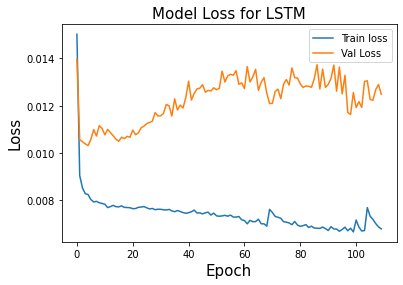

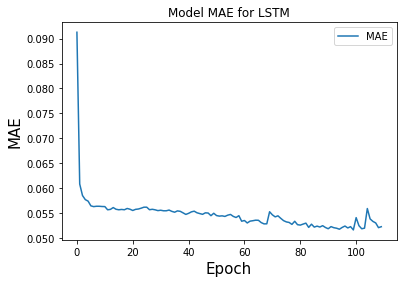

In [ ]:
plot_loss(h1,'LSTM')

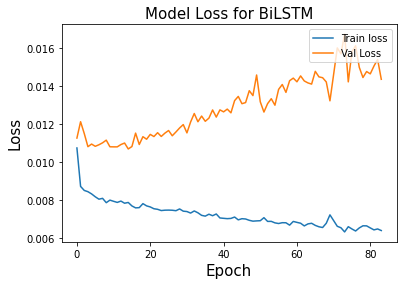

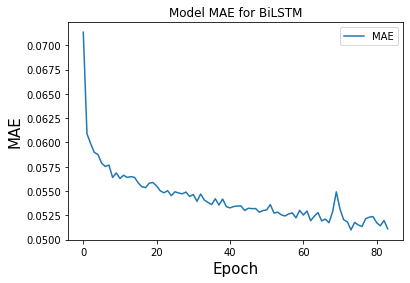

In [ ]:
plot_loss(h2,'BiLSTM')

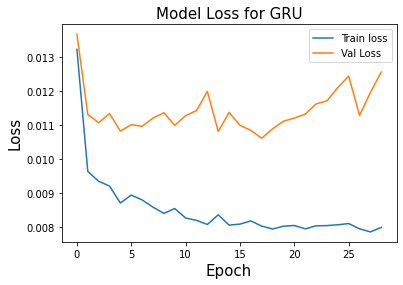

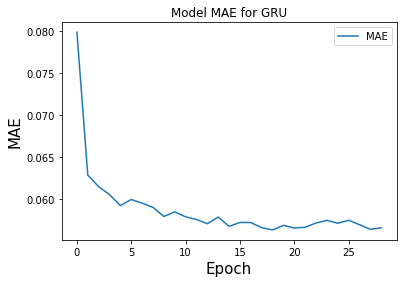

In [ ]:
plot_loss(h3,'GRU')

In [ ]:
lstm_pred_16year=m1.predict(x[1212:,:,:])
bilstm_pred_16year=m2.predict(x[1212:,:,:])
gru_pred_16year=m3.predict(x[1212:,:,:])
newy=(y[1212:,4:5])
lstm_pred_16year=scaler.inverse_transform(lstm_pred_16year)
bilstm_pred_16year=scaler.inverse_transform(bilstm_pred_16year)
gru_pred_16year=scaler.inverse_transform(gru_pred_16year)
newy=scaler.inverse_transform(newy)
print(len(lstm_pred_16year))
print(len(bilstm_pred_16year))
print(len(gru_pred_16year))
print(len(newy))
yhat1_mean=(np.mean(lstm_pred_16year,axis=1))
yhat2_mean=(np.mean(bilstm_pred_16year,axis=1))
yhat3_mean=(np.mean(gru_pred_16year,axis=1))
ytest_mean=(np.mean(newy,axis=1))
print('RMSE(lstm):',sqrt(mean_squared_error(newy,lstm_pred_16year)))
print('RMSE(bilstm):',sqrt(mean_squared_error(newy,bilstm_pred_16year)))
print('RMSE(gru):',sqrt(mean_squared_error(newy,gru_pred_16year)))

192
192
192
192
RMSE(lstm): 3.739896991470489
RMSE(bilstm): 3.990945628758971
RMSE(gru): 3.7113371725969104


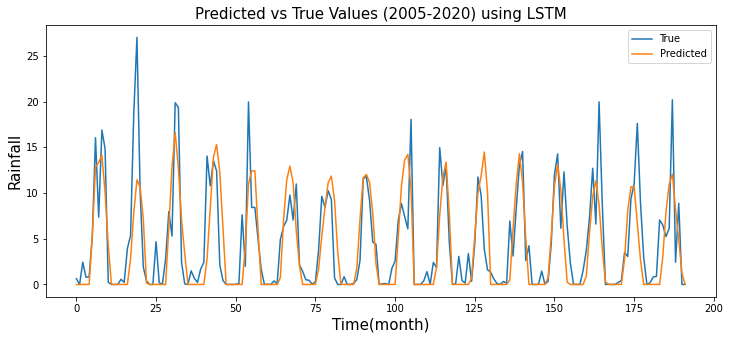

In [ ]:
compareall(ytest_mean,yhat1_mean,'LSTM')

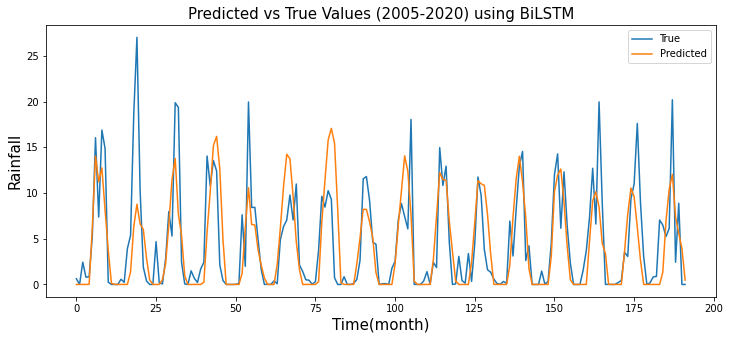

In [ ]:
compareall(ytest_mean,yhat2_mean,'BiLSTM')

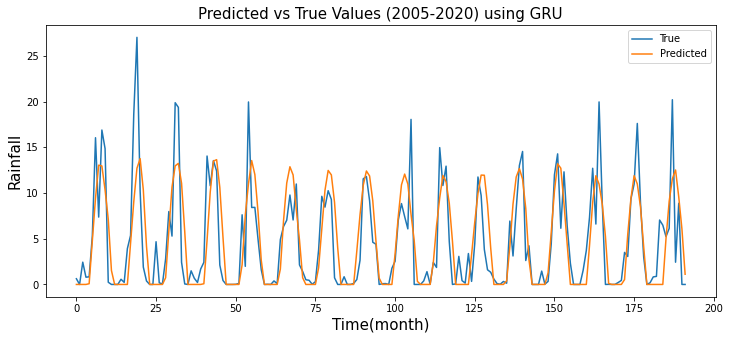

In [ ]:
compareall(ytest_mean,yhat3_mean,'GRU')

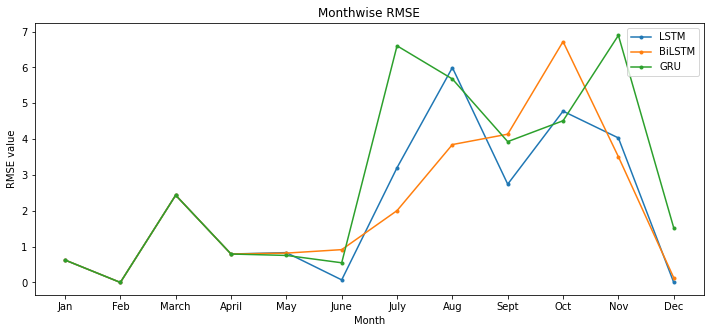

In [ ]:
rmse_lstm=[]
rmse_bilstm=[]
rmse_gru=[]
years = np.arange(1901, 2021)
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
for i in range(12):
  rmse_lstm.append(sqrt(mean_squared_error(lstm_pred_16year[i],newy[i])))
  rmse_bilstm.append(sqrt(mean_squared_error(bilstm_pred_16year[i],newy[i])))
  rmse_gru.append(sqrt(mean_squared_error(gru_pred_16year[i],newy[i])))

plt.figure(figsize = (12, 5))
plt.plot(months,rmse_lstm,marker='.',label='LSTM')
plt.plot(months,rmse_bilstm,marker='.',label='BiLSTM')
plt.plot(months,rmse_gru,marker='.',label='GRU')
plt.title('Monthwise RMSE')
plt.ylabel('RMSE value')
plt.xlabel('Month')
plt.legend(loc='upper right')

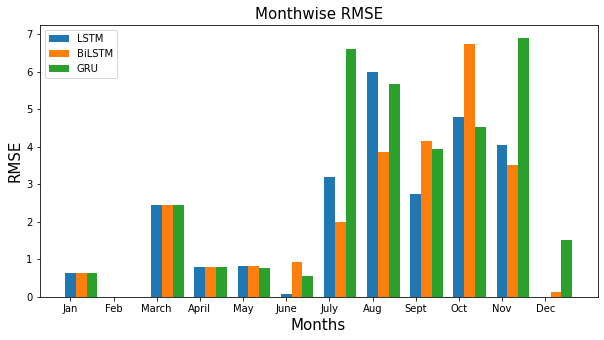

In [ ]:
m=np.arange(len(months))
plt.figure(figsize = (10, 5))
patterns = [ "|" , ".." , "///" , "**" , "-", ".", "*","x", "o", "O" ]
plt.bar(m+0.00,rmse_lstm,width=0.25,label='LSTM')
plt.bar(m+0.25,rmse_bilstm,width=0.25,label='BiLSTM')
plt.bar(m+0.50,rmse_gru,width=0.25,label='GRU')
plt.xticks(ticks=m, labels=months)
plt.title('Monthwise RMSE',fontsize=15)
plt.xlabel('Months',fontsize=15)
plt.ylabel('RMSE',fontsize=15)
plt.legend()

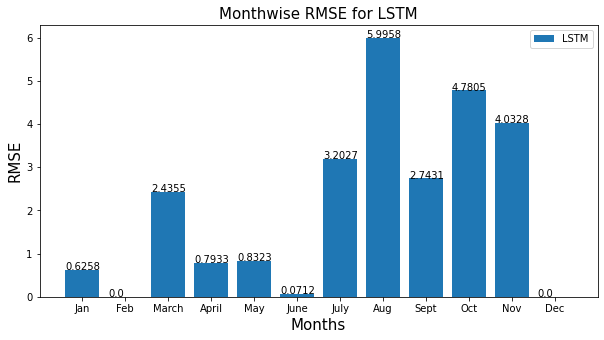

In [ ]:
m=np.arange(len(months))
#plt.figure(figsize = (10, 5))
fig, ax = plt.subplots(figsize =(10, 5))
patterns = [ "|" , ".." , "///" , "**" , "-", ".", "*","x", "o", "O" ]

ax=plt.bar(m+0.00,rmse_lstm,label='LSTM')
stdv=np.std(rmse_lstm)
plt.xticks(ticks=m, labels=months)
plt.title('Monthwise RMSE for LSTM',fontsize=15)
plt.xlabel('Months',fontsize=15)
plt.ylabel('RMSE',fontsize=15)
plt.legend()
for i in ax.patches:
  plt.text(i.get_x(), i.get_height(),str(round((i.get_height()), 4))) 

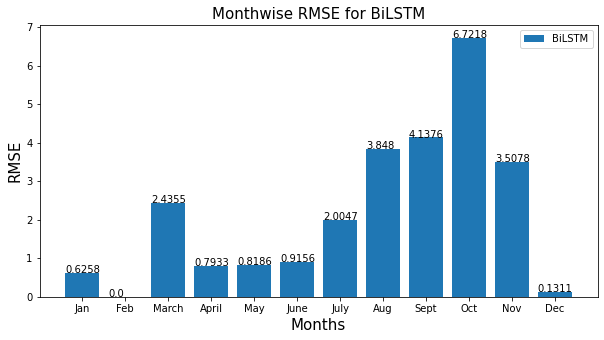

In [ ]:
m=np.arange(len(months))
#plt.figure(figsize = (10, 5))
patterns = [ "|" , ".." , "///" , "**" , "-", ".", "*","x", "o", "O" ]

fig, ax = plt.subplots(figsize =(10, 5))
ax=plt.bar(m,rmse_bilstm,label='BiLSTM')
plt.xticks(ticks=m, labels=months)
plt.title('Monthwise RMSE for BiLSTM',fontsize=15)
plt.xlabel('Months',fontsize=15)
plt.ylabel('RMSE',fontsize=15)
plt.legend()
for i in ax.patches:
  plt.text(i.get_x(), i.get_height(),str(round((i.get_height()), 4))) 

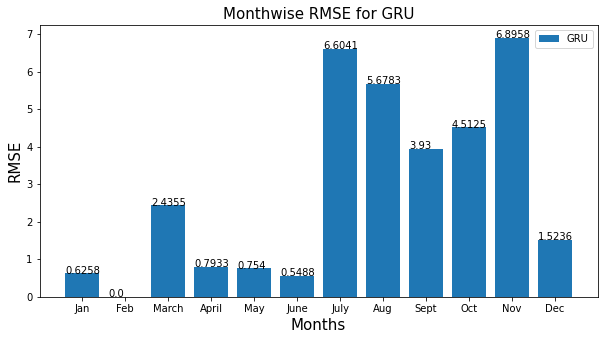

In [ ]:
m=np.arange(len(months))
#plt.figure(figsize = (10, 5))
fig, ax = plt.subplots(figsize =(10, 5))
patterns = [ "|" , ".." , "///" , "**" , "-", ".", "*","x", "o", "O" ]

ax=plt.bar(months,rmse_gru,label='GRU')
#plt.xticks(ticks=m, labels=months)
plt.title('Monthwise RMSE for GRU',fontsize=15)
plt.xlabel('Months',fontsize=15)
plt.ylabel('RMSE',fontsize=15)
plt.legend()
for i in ax.patches:
  plt.text(i.get_x(), i.get_height(),str(round((i.get_height()), 4))) 